In [179]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [180]:
#import required libraries


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [181]:
#load data set

file_path = "/Users/harinathreddy/Downloads/KKRGENAI- USECASE1-CLAIM-DATA.csv"
df= pd.read_csv(file_path)
df.head()

,Claim ID,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Previous_Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,167647,Male,22,1,7,1,< 1 Year,No,2630,152,0
1,17163,Male,42,1,28,0,1-2 Year,Yes,43327,26,0
2,32023,Female,66,1,33,0,1-2 Year,Yes,35841,124,0
3,87447,Female,22,1,33,0,< 1 Year,No,27645,152,0
4,501933,Male,28,1,46,1,< 1 Year,No,29023,152,0


In [182]:
#data exploration

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Claim ID                 382154 non-null  int64 
 1   Gender                   382154 non-null  object
 2   Age                      382154 non-null  int64 
 3   Driving_License          382154 non-null  int64 
 4   Region_Code              382154 non-null  int64 
 5   Previously_Insured       382154 non-null  int64 
 6   Vehicle_Age              382154 non-null  object
 7   Previous_Vehicle_Damage  382154 non-null  object
 8   Annual_Premium           382154 non-null  int64 
 9   Policy_Sales_Channel     382154 non-null  int64 
 10  Response                 382154 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 32.1+ MB


In [184]:
df.describe()

,Claim ID,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,1.000000


In [185]:
df.isnull().sum()

Claim ID                   0
Gender                     0
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Previous_Vehicle_Damage    0
Annual_Premium             0
Policy_Sales_Channel       0
Response                   0
dtype: int64

In [186]:
#Data Preprocessing
# Encoding the categorical variables



In [187]:
label_encoders={}
categorical_columns = ['Gender','Vehicle_Age','Previous_Vehicle_Damage']


In [188]:
#apply label encoding 


# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

# Verify the column names
print(df.columns)

# Now apply label encoding
label_encoders = {}

for col in categorical_columns:
    if col in df.columns:  # Check if the column exists in the DataFrame
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")

Index(['Claim ID', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Previous_Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Response'],
      dtype='object')


In [189]:
df.head()

,Claim ID,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Previous_Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,167647,1,22,1,7,1,1,0,2630,152,0
1,17163,1,42,1,28,0,0,1,43327,26,0
2,32023,0,66,1,33,0,0,1,35841,124,0
3,87447,0,22,1,33,0,1,0,27645,152,0
4,501933,1,28,1,46,1,1,0,29023,152,0


In [190]:
#handling the missing data

df=df.dropna()
df.isnull().sum()

Claim ID                   0
Gender                     0
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Previous_Vehicle_Damage    0
Annual_Premium             0
Policy_Sales_Channel       0
Response                   0
dtype: int64

In [191]:
df.columns

Index(['Claim ID', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Previous_Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Response'],
      dtype='object')

In [192]:
#SPLIT DATA INTO TRAINING AND TESTING SETS

# Print column names to identify the target column
print(df.columns)

# Replace 'Target' with the actual target column name after inspecting the output
X = df.drop('Response', axis=1)  # Replace 'Target' with your actual target column name
y = df['Response']  # Replace 'Target' with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Index(['Claim ID', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Previous_Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Response'],
      dtype='object')
Shape of X_train: (305723, 10)
Shape of X_test: (76431, 10)
Shape of y_train: (305723,)
Shape of y_test: (76431,)


In [193]:
#feature scaling 
Scaler = StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [194]:
# Train the model

model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train_scaled,y_train)
print("model Training Completed")


model Training Completed


In [195]:
#make predictions
y_pred = model.predict(X_test_scaled)
print(y_pred[:10])

[0 0 0 0 0 0 0 0 0 0]


In [196]:
#evaluate the model

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     63789
           1       0.77      0.45      0.57     12642

    accuracy                           0.89     76431
   macro avg       0.84      0.71      0.75     76431
weighted avg       0.88      0.89      0.88     76431


Confusion Matrix:
[[62114  1675]
 [ 6890  5752]]


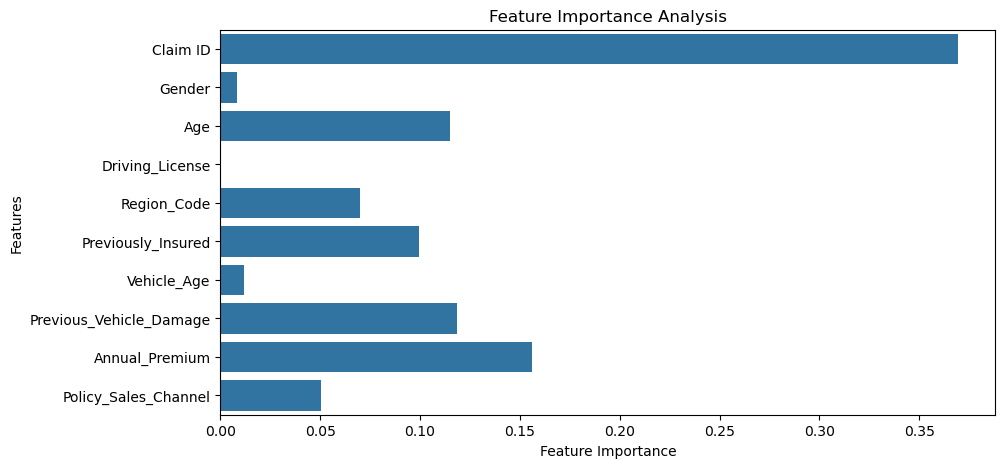

In [197]:


# Get feature importances
feature_importance = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Analysis")
plt.show()

In [218]:
#save and expoet the model


# Save model
joblib.dump(model, "insurance_claim_model.pkl")

# Save scaler
joblib.dump(Scaler, "scaler.pkl")


['scaler.pkl']